In [ ]:
#Estadistica Aplicada III
#Proyecto !
#Luis Edmundo Gatica Norato, CU: 150703

In [55]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [46]:
X = np.zeros((2280,32256))

In [48]:
for j in range (1,40):
    if(j!=14):
        if(j<10):
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB0"+str(j)+"/"
        else:
            path = "/Users/mundogn/Documents/Estadistica-III-Proy1/CroppedYale_3/yaleB"+str(j)+"/"
        for i in range(1,56):
            im = Image.open(path+str(i)+".pgm")
            aux = np.asarray(im.getdata())
            aux = np.transpose(aux)
            X[(j-1)*30+i-1] = aux
    

In [49]:
X = np.transpose(X)

2280

In [50]:
pca = PCA(n_components = 20)
principalComponents = pca.fit_transform(X)

In [51]:
principalComponents[:,0]

array([ 1488.90444702,  1545.85386879,  1582.91917432, ...,
       -1807.05485828, -1813.99146335, -1820.16170232])

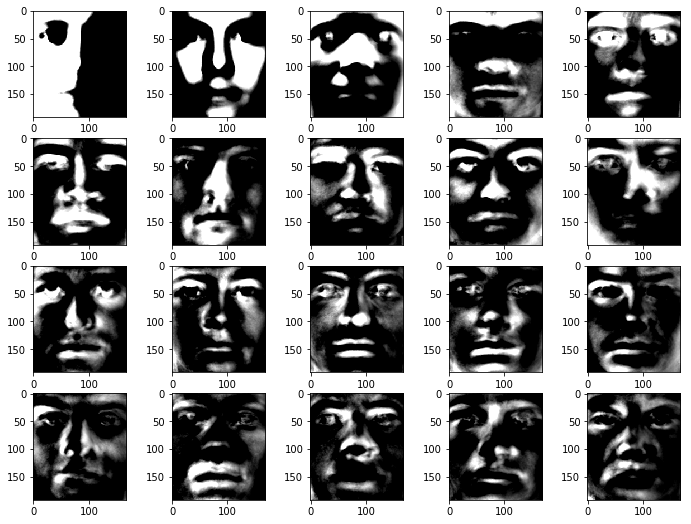

In [67]:
fig,axes = plt.subplots( 4,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(principalComponents[:,i])
    iax.imshow(im)
fig.show()

In [52]:
im.putdata(principalComponents[:,8])
im.show()

In [53]:
pca.explained_variance_ratio_

array([0.50372556, 0.14764154, 0.06213823, 0.0254349 , 0.02040375,
       0.01586041, 0.01252436, 0.01102023, 0.01062716, 0.00986771,
       0.00831854, 0.00750298, 0.00706774, 0.00672222, 0.00592371,
       0.00564449, 0.00534634, 0.00433352, 0.00418463, 0.00399795])

In [56]:
principalDf = pd.DataFrame(data = pca.explained_variance_ratio_
             , columns = ['Varianza explicada por componente'])
principalDf.head(20)

,Varianza explicada por componente
0,0.503726
1,0.147642
2,0.062138
3,0.025435
4,0.020404
5,0.015860
6,0.012524
7,0.011020
8,0.010627
9,0.009868


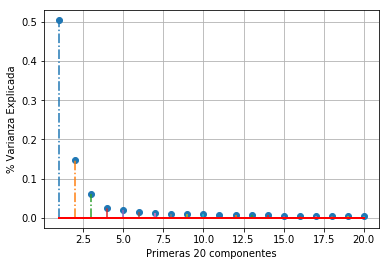

In [57]:
plt.ylabel('% Varianza Explicada')
plt.xlabel('Primeras 20 componentes')
plt.grid(True)
x = np.linspace(1, 20, 20)

markerline, stemlines, baseline = plt.stem(x, pca.explained_variance_ratio_, '-.')

# setting property of baseline with color red and linewidth 2
plt.setp(baseline, color='r', linewidth=2)

plt.show()

In [42]:
X_pca = pca.transform(X)
projected = pca.inverse_transform(X_pca)
len(projected[0])


2280

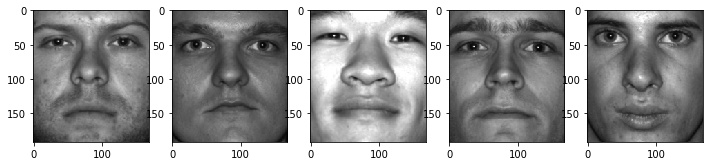

In [65]:
fig,axes = plt.subplots( 1,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(X[:,i*180])
    iax.imshow(im)
fig.show()

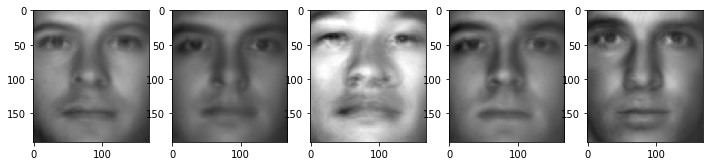

In [64]:
fig,axes = plt.subplots( 1,5, figsize=[12,9] )
for i,iax in enumerate( axes.flatten() ):
    im.putdata(projected[:,i*180])
    iax.imshow(im)
fig.show()

In [66]:
X_hat = X.mean(axis=1)
im.putdata(X_hat)
im.show()

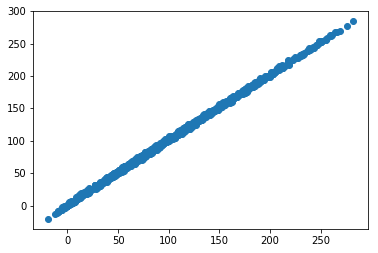

In [68]:
plt.scatter(projected[0], projected[1])
plt.show()